# The GroupBy Object

**groupby**는 데이터프레임이나 시리즈를 특정 열(column) 값을 기준으로 그룹으로 묶은 후, 각 그룹에 대해 집계(aggregation), 변환(transformation), 필터링(filtering) 등을 수행할 수 있게 해주는 기능.

한 줄로 요약하면:

**"비슷한 값을 가진 데이터끼리 묶어서 계산하거나 처리하는 것"**

```
import pandas as pd

# 예시 데이터
df = pd.DataFrame({
    '팀': ['A', 'B', 'A', 'B', 'A'],
    '점수': [10, 20, 15, 25, 10]
})

# '팀'별로 점수 합계 구하기
팀별_점수합 = df.groupby('팀')['점수'].sum()

print(팀별_점수합)

```

```
결과:


팀
A    35
B    45
Name: 점수, dtype: int64
```

In [ ]:
import pandas as pd

## The Fortune 1000 Dataset
- The **Fortune 1000** is a listing of the 1000 largest American companies as ranked by Fortune magazine.
- The **DataFrame** includes the company's name, sector, industry, and revenues, profits, and employees.

## 포춘 1000 데이터셋
- **포춘 1000**은 포춘(Fortune)지가 선정한 미국 1000대 대기업 목록입니다.
- 이 **DataFrame**에는 회사명, 부문, 산업, 수익, 이익, 직원 수 정보가 포함되어 있습니다.

In [ ]:
fortune = pd.read_csv("fortune1000.csv", ___) # Rank 열을 인덱스로 사용하도록 옵션을 넣어주자.
fortune.head()

## The groupby Method
- **Grouping** is a way to organize/categorize/group the data based on a column's values.
- The `groupby` method returns a **DataFrameGroupBy** object. It resembles a group/collection of **DataFrames** in a dictionary-like structure.
- The **DataFrameGroupBy** object can perform aggregate operations on *each* group within it.

## groupby 메서드
- **그룹화(Grouping)**는 특정 열의 값을 기준으로 데이터를 정리하거나 분류하는 방법입니다.
- `groupby` 메서드는 딕셔너리와 비슷한 구조로 여러 **DataFrame**을 모은 **DataFrameGroupBy** 객체를 반환합니다.
- **DataFrameGroupBy** 객체는 그 안의 *각* 그룹에 대해 집계 연산을 수행할 수 있습니다.

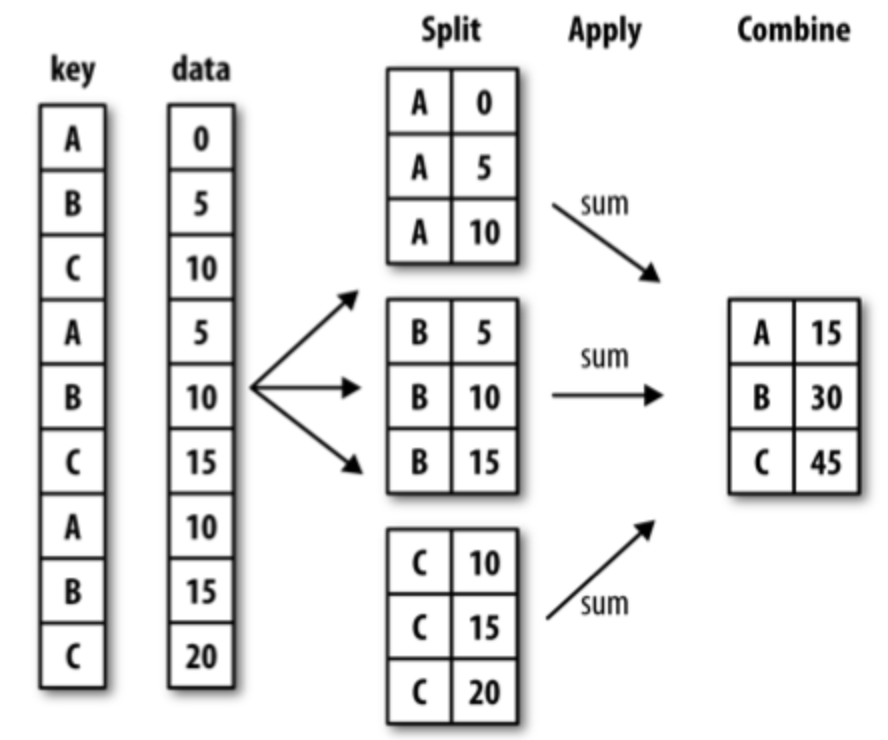

#### 보통 데이터그룹의 연산은 데이터 세트 객체를 그룹별로 분할 (split) 하고 분할 된 각 그룹에 함수를 적용 (apply) 하고, 결과를 통합 (combine) 하는 연산을 수행한다.

In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank")
fortune.head()

### 각 섹터마다 총 이익을 구하고 싶다고 해보자.

In [ ]:
# 어떻게 코딩 할 수 있을까?


### 같은 기능을 좀 더 효율적으로 해보자.

In [ ]:
sectors = fortune.groupby("Sector")
sectors # 뭐라고 나오는가?

#### ---> 같은 섹터에 속하는 rows 가 같이 그룹화되어있다. 하지만, 이를 확인하기는 어렵다.

### sector 가 몇으로 나뉘어있는지 확인해볼 수 있다. len()

In [ ]:
#

### 각 섹터에 몇개의 데이터들이 속해있는지 확인할 수 있다.

In [ ]:
#

### groupby 는 그룹이 묶여있는 형태로 바로 확인하기는 어려우나, 이를 개략적으로 확인할 때는 그룹화된 키 (그룹이름) 만 확인하거나, 어떤 인덱스들이 들어갔는지 볼 수 있음.


---



In [ ]:
#

### 혹은 간단히 딕셔너리 형태로도 확인할 수 있음.

In [ ]:
#

###. groupby 객체의 가장 앞줄을 확인할 수 있는 first() 메소드가 있다.

In [ ]:
#

### 마찬가지로 각 그룹의 마지막 행만 보는 메소드 .last() 도 있다.

In [ ]:
#

### 그외에 사용할 수 있는 groupby 객체 메소드

| 메소드 | 설명 |
|:---|:---|
| `.sum()` | 그룹별 합계 계산 |
| `.mean()` | 그룹별 평균 계산 |
| `.count()` | 그룹별 데이터 개수 세기 |
| `.max()` | 그룹별 최댓값 찾기 |
| `.min()` | 그룹별 최소값 찾기 |
| `.median()` | 그룹별 중앙값 계산 |
| `.std()` | 그룹별 표준편차 계산 |
| `.var()` | 그룹별 분산 계산 |
| `.first()` | 그룹별 첫 번째 값 가져오기 |
| `.last()` | 그룹별 마지막 값 가져오기 |
| `.apply()` | 그룹별로 직접 함수를 적용 |
| `.agg()` | 여러 함수를 동시에 적용 (예: 평균과 합계 같이) |
| `.transform()` | 그룹별 연산 결과를 원래 크기로 되돌려 매칭 |
| `.filter()` | 조건을 만족하는 그룹만 남기기 |


# Retrieve a Group with the get_group Method
- The `get_group` method on the **DataFrameGroupBy** object retrieves a nested **DataFrame** belonging to a specific group/category.


- **DataFrameGroupBy** 객체의 `get_group` 메서드를 이용하면 특정 그룹이나 카테고리에 속하는 **DataFrame**을 가져올 수 있습니다.

In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank") # 다시 불러와서, Sector 중심으로 그룹화해보자.
sectors = fortune.groupby("Sector")

fortune.head(5)

### 그룹화된 객체에서 특정 그룹을 갖고 와보자: Energy 그룹 갖고 오기 with get_group()

In [ ]:
#

### Technology 그룹도 갖고와보자.

In [ ]:
#

# Methods on the GroupBy Object
- Use square brackets on the **DataFrameGroupBy** object to "extract" a column from the original **DataFrame**.
- The resulting **SeriesGroupBy** object will have aggregation methods available on it.
- Pandas will perform the calculation on *every* group within the collection.
- For example, the `sum` method will sum together the **Revenues** for every row by group/category.


- **DataFrameGroupBy** 객체에 대괄호를 사용하여 원본 **DataFrame**에서 특정 열을 "추출"할 수 있습니다.
- 이렇게 얻어진 **SeriesGroupBy** 객체에는 다양한 집계 메서드를 사용할 수 있습니다.
- Pandas는 컬렉션 내의 *모든* 그룹에 대해 계산을 수행합니다.
- 예를 들어, `sum` 메서드는 그룹/카테고리별로 **수익(Revenues)**을 모두 합산합니다.

In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank")
sectors = fortune.groupby("Sector")

fortune.head(5)

### [열이름]을 사용하여 그룹들 중 어떤 열에 계산을 적용할지 결정할 수 있다.

In [ ]:
# 각 그룹의 Revenue 열의 총 합을 구해보자.

### 마찬가지로, Employees 열의 각 섹터별 총 합을 구해보자.

In [ ]:
#

### 여러 열들을 선택해서 특정 계산을 수행할 수도 있다. 각 섹터별로 Revenue, Profits 열의 평균을 계산해보자.

In [ ]:
#

### 마찬가지로, Revenue, Profits 열의 총합을 구해보자.

In [ ]:
#

# Grouping by Multiple Columns
- Pass a list of columns to the **groupby** method to group by pairings of values across columns.
- Target a column to retrieve the **SeriesGroupBy** object, then perform an aggregation with a method.
- Pandas will return a **MultiIndex** **Series** where the levels will be the original groups.

- groupby 메서드에 열(column) 리스트를 전달하면, 여러 열의 값 조합을 기준으로 그룹화할 수 있습니다.

- 특정 열을 선택하면 SeriesGroupBy 객체를 얻을 수 있으며, 이후 메서드를 이용해 집계(aggregation)를 수행할 수 있습니다.

- 판다스는 그룹 레벨이 원래 그룹 구조를 반영하는 MultiIndex 형태의 Series를 반환합니다.

In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank")
sectors = fortune.groupby([__, __]) # Sector 와 Industry 를 사용해서 멀티그루핑을 해보자.

fortune.head(5)

### 각 그룹의 크기가 어떻게 되는지 확인해보자: size()

In [ ]:
 #

### 멀티그루핑이 되었어도, 특정 열에 대해 특정 연산을 수행하는 것은 동일하게 진행할 수 있다. Revenue 열의 총 합을 구해보자.

In [ ]:
#

## The agg Method
- The `agg` method applies different aggregation methods on different columns.
- Invoke the `agg` method directly on the **DataFrameGroupBy** object.
- Pass the method a dictionary where the keys are the columns and the values are the aggregation operations.

## agg 메서드 (aggregation 의 줄임말)
- `agg` 메서드는 서로 다른 열에 대해 서로 다른 집계 방법을 적용할 수 있습니다.
- **DataFrameGroupBy** 객체에 직접 `agg` 메서드를 호출합니다.
- 열 이름을 키로, 집계 연산을 값으로 하는 딕셔너리를 메서드에 전달합니다.


In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank")
sectors = fortune.groupby("Sector")

fortune.head(5)

### {열이름: 문자형태의 적용 연산 함수이름} 을 적용하여, 각 열에 다른 연산을 적용할 수 있다. 무슨 소리일까?

In [ ]:
#"Revenue":"sum" 연산을, "Profits":"max"연산을, "Employees":"mean" 연산을 수행해보자.
#

### 요약 통계 이름을 주면서 다양하게 구할 수도 있다.

In [ ]:
# 실행해보자.
import pandas as pd

# 예시 데이터
df = pd.DataFrame({
    '학급': ['A', 'A', 'B', 'B', 'C'],
    'math': [80, 90, 70, 85, 95],
    'english': [75, 88, 65, 90, 85]
})

# 학급별로 수학 점수 평균과 합계 계산 : mean_math 의 튜플형 데이터는 적용할 열 이름과 적용할 함수를 의미한다. 그리고 'mean_math' 등은
# 요약 통계에서 해당 연산을 수행한 후 얻어진 새로운 열의 이름이다.
result = df.groupby('학급').agg(
    mean_math=('math', 'mean'),
    sum_math=('math', 'sum')
)

print(result)


## Iterating through Groups
- The **DataFrameGroupBy** object supports the `apply` method (just like a **Series** and a **DataFrame** do).
- The `apply` method invokes a function on every nested **DataFrame** in the **DataFrameGroupBy** object.
- It captures the return values of the functions and collects them in a new **DataFrame** (the return value).

## 그룹을 순회(iterating)하기
- **DataFrameGroupBy** 객체는 `apply` 메서드를 지원합니다 (**Series**나 **DataFrame**과 마찬가지로).
- `apply` 메서드는 **DataFrameGroupBy** 객체 내 각 중첩된 **DataFrame**에 대해 함수를 적용합니다.
- 함수들의 반환 값을 모아 새로운 **DataFrame**으로 반환합니다.


In [ ]:
fortune = pd.read_csv("fortune1000.csv", index_col="Rank")
sectors = fortune.groupby("Sector")

fortune.head(5)

### 섹터별로 가장 직원이 많은 회사 2개씩 뽑고 싶다. 어떻게 할 수 있을까?

In [ ]:
# nlargest() 방법을 써보자.

#### nlargest()란?
- **nlargest(n, columns)**는 데이터프레임이나 시리즈에서 가장 큰 값 상위 n개를 추출하는 메서드.

```
import pandas as pd

# 예시 데이터
df = pd.DataFrame({
    '이름': ['철수', '영희', '민수', '지민'],
    '점수': [87, 92, 78, 95]
})

# 점수가 높은 순서로 상위 2명 뽑기
top_students = df.nlargest(2, '점수')

print(top_students)

```
```
# 출력결과

    이름  점수
3  지민  95
1  영희  92
```

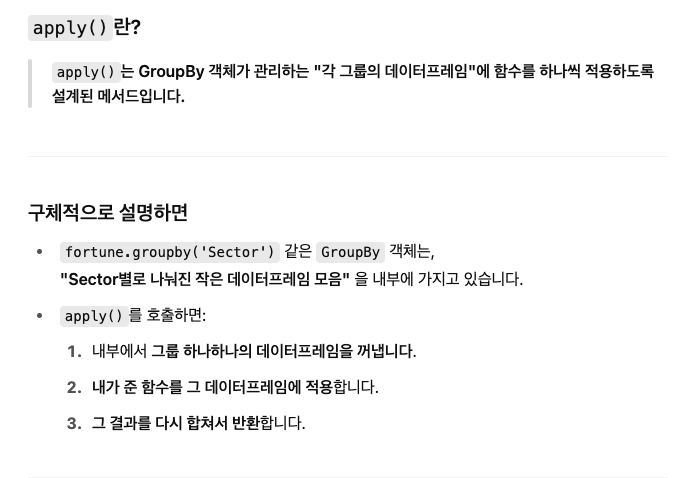

In [ ]:
# nlargest() 와 apply 를 써서 각 섹터별로 가장 직원이 많은 회사 2개를 뽑아보자.

# (1) sector (dataframe) 을 받아서, 가장 직원이 많은 회사 2개를 반환하도록 하는 함수 정의
# (2) 그 함수를 apply 를 써서 dataframegroupby 객체인 sectors 에 적용.

# 다음을 풀어 배운 내용을 익혀보자.

# 1. 부문(Sector)별 총 수익 구하기
- Sector를 기준으로 그룹화하여 Revenue 합계를 계산하라.

- 수익이 가장 높은 부문을 찾아라.
- 결과를 **막대그래프(bar plot)**로 나타내라.

- x축은 Sector 이름, y축은 총 수익으로 설정하고, 그래프 제목도 추가하라.

In [ ]:
#

# 2. 산업군(Industry)별 평균 이익 구하기
- Industry를 기준으로 그룹화하여 Profits의 평균을 계산하라.

- 평균 이익이 가장 높은 산업군과 가장 낮은 산업군을 각각 구하라.
- 가장 산업군 평균이 높은 10개 산업군을 골라서, 막대 그래프로 그려라.

In [ ]:
#

# 3. 부문(Sector)별 직원 수 총합과 평균을 구하고, 두 결과를 나란히(side-by-side) 막대그래프로 시각화하시오.

- groupby를 사용하여 Employees의 총합과 평균을 각각 계산하라.

- 두 값을 한 그래프에 나란히 표시하라.

- x축은 Sector, y축은 직원 수(단위: 명)로 설정하라.

- 그래프 제목과 범례를 추가하라.

In [ ]:
#

# 4. 수익 대비 이익률(Profit Margin)을 계산하고, 부문(Sector)별 평균 Profit Margin을 시각화하시오.

- 각 회사에 대해 Profit Margin = Profits / Revenue를 계산하여 새로운 열을 추가하라.

- Sector별로 그룹화하여 평균 Profit Margin을 구하라.

- 평균 이익률이 높은 순서대로 정렬하여 가로 막대그래프(horizontal bar plot)로 나타내라.

- x축은 Sector, y축은 평균 Profit Margin으로 설정하고, 그래프 제목도 추가하라.



In [ ]:
#

# 5. 부문(Sector)별 최고 순위(가장 작은 Rank)를 가진 회사를 찾고, 이를 시각화하시오.

- Sector별로 그룹화하여 Rank가 가장 낮은(가장 높은 순위) 회사를 찾아라.

- 각 부문별 1등 기업의 이름과 순위를 정리하라.

- 부문별 최고 순위(Rank)를 세로 막대그래프로 그리되,

- x축에는 부문(Sector) 이름을,

- y축에는 순위(Rank)를 사용하라.

- 순위는 숫자가 작을수록 높은 것이므로, y축을 뒤집어 1등이 위로 오게 하라.



In [ ]:
#